# Lab | Imbalanced data

***We will be using the files_for_lab/customer_churn.csv dataset to build a churn predictor.***

***Instructions:***
1. Load the dataset and explore the variables.
2. We will try to predict variable ***Churn*** using a logistic regression on variables ***tenure, SeniorCitizen,MonthlyCharges.***
3. Extract the target variable.
4. Extract the independent variables and scale them.
5. Build the logistic regression model.
6. Evaluate the model.
7. Even a simple model will give us more than 70% accuracy. Why?
    
8. Synthetic Minority Oversampling TEchnique (SMOTE) is an over sampling technique based on nearest neighbors that adds new points between existing points. Apply imblearn.over_sampling.SMOTE to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

9. Tomek links are pairs of very close instances, but of opposite classes. Removing the instances of the majority class of each pair increases the space between the two classes, facilitating the classification process. Apply imblearn.under_sampling.TomekLinks to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("C:\\Users\\31645\\OneDrive\\Documents\\Ironhack\\LABs\\lab-imbalanced-data\\files_for_lab\\customer_churn.csv")

In [3]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


## Check data

In [4]:
data.shape

(7043, 21)

In [5]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [7]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

## Data Cleaning

In [9]:
data = data[data['SeniorCitizen'].isna() == False]

In [10]:
data = data[data['tenure'].isna() == False]

In [11]:
data = data[data['MonthlyCharges'].isna() == False]           

In [12]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [13]:
data.columns = data.columns.str.title().str.replace(' ','_')

In [14]:
data

,Customerid,Gender,Seniorcitizen,Partner,Dependents,Tenure,Phoneservice,Multiplelines,Internetservice,Onlinesecurity,...,Deviceprotection,Techsupport,Streamingtv,Streamingmovies,Contract,Paperlessbilling,Paymentmethod,Monthlycharges,Totalcharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [15]:
for i in data.select_dtypes('object'):
    print(data[i].value_counts(), '\n')

7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: Customerid, Length: 7043, dtype: int64 

Male      3555
Female    3488
Name: Gender, dtype: int64 

No     3641
Yes    3402
Name: Partner, dtype: int64 

No     4933
Yes    2110
Name: Dependents, dtype: int64 

Yes    6361
No      682
Name: Phoneservice, dtype: int64 

No                  3390
Yes                 2971
No phone service     682
Name: Multiplelines, dtype: int64 

Fiber optic    3096
DSL            2421
No             1526
Name: Internetservice, dtype: int64 

No                     3498
Yes                    2019
No internet service    1526
Name: Onlinesecurity, dtype: int64 

No                     3088
Yes                    2429
No internet service    1526
Name: Onlinebackup, dtype: int64 

No                     3095
Yes                    2422
No internet service    1526
Name: Devicepro

In [16]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)

## EDA

In [17]:
data.corr()

,Seniorcitizen,Tenure,Monthlycharges
Seniorcitizen,1.000000,0.016567,0.220173
Tenure,0.016567,1.000000,0.247900
Monthlycharges,0.220173,0.247900,1.000000


In [18]:
corr_matrix = data.corr()

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

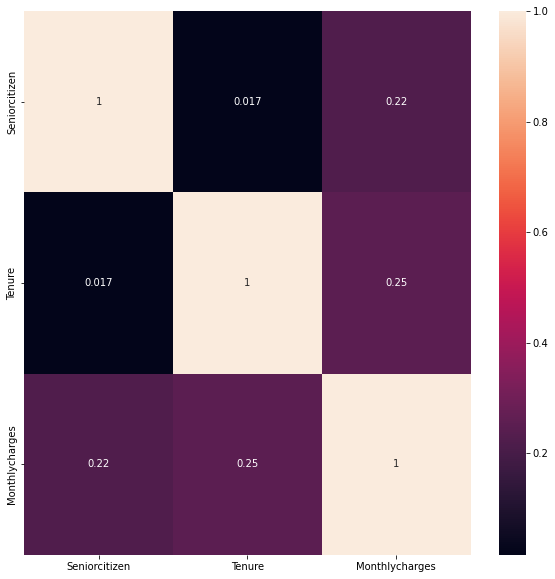

In [20]:
fig, ax = plt.subplots(figsize = (10,10))
ax = sns.heatmap(corr_matrix, annot = True)
plt.show()
# showing correlations between numerical variables

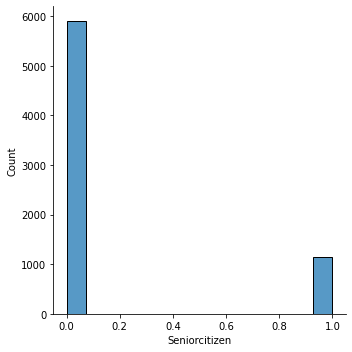

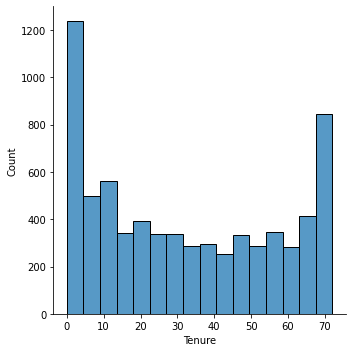

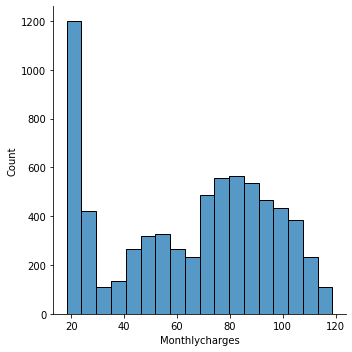

In [21]:
import numpy as np
import warnings
warnings.filterwarnings("ignore")

for i in data.select_dtypes(np.number):
    sns.displot(data[i])
    plt.show()

## Feature Engineering

In [22]:
from scipy import stats

In [23]:
### o converted to 1 by mistake - noticed on Seniorcitizen
"""
def boxcox_transform(df):
    numeric_columns = df.select_dtypes('int').columns
    _ci = {column: None for column in numeric_columns}
    for column in numeric_columns:
        df[column] = np.where(df[column]<= 0, np.NAN, df[column])
        df[column] = df[column].fillna(df[column].mean())
        transformed_data, ci = stats.boxcox(df[column])
        df[column] = transformed_data
        _ci[column] = [ci]
    return df, _ci

df, _ci = boxcox_transform(data)
df
"""

"\ndef boxcox_transform(df):\n    numeric_columns = df.select_dtypes('int').columns\n    _ci = {column: None for column in numeric_columns}\n    for column in numeric_columns:\n        df[column] = np.where(df[column]<= 0, np.NAN, df[column])\n        df[column] = df[column].fillna(df[column].mean())\n        transformed_data, ci = stats.boxcox(df[column])\n        df[column] = transformed_data\n        _ci[column] = [ci]\n    return df, _ci\n\ndf, _ci = boxcox_transform(data)\ndf\n"

## Extract the target variable

In [24]:
y = data['Churn']
y

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

## Extract the independent variables and scale them

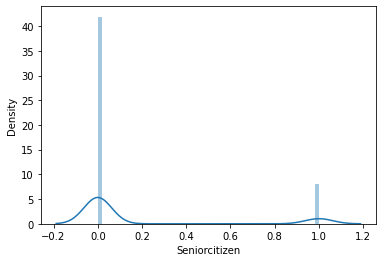

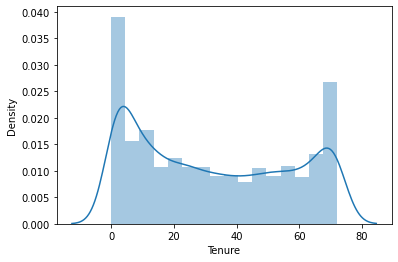

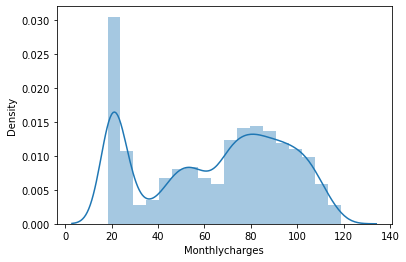

In [25]:
x = data.drop('Churn', axis =1)
for i in x.select_dtypes(np.number):
    sns.distplot(x[i])
    plt.show()

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer # for Tenure and MonthlyCharges
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [28]:
pd.set_option('display.max_rows', 100)
#x.dtypes

In [33]:
# extracting numerical data
x_num = x.select_dtypes(np.number)
x_cat = x.select_dtypes('object')
x_num

,Seniorcitizen,Tenure,Monthlycharges
0,0,1,29.85
1,0,34,56.95
2,0,2,53.85
3,0,45,42.30
4,0,2,70.70
...,...,...,...
7038,0,24,84.80
7039,0,72,103.20
7040,0,11,29.60
7041,1,4,74.40


In [34]:
#normalizing numerical data
import pickle
model_norm = Normalizer()
model_norm.fit(x_num)

Normalizer()

In [35]:
with open ('model_norm.pkl', 'wb') as file:
    pickle.dump(model_norm, file)
with open ('model_norm.pkl', 'rb') as file:
    model_norm = pickle.load(file)

In [37]:
x_num_normalized = model_norm.transform(x_num)
x_num_normalized.shape

(7043, 3)

In [40]:
#using Standard Scaler
model_ss = StandardScaler()
model_ss.fit(x_num)

StandardScaler()

<AxesSubplot:ylabel='Density'>

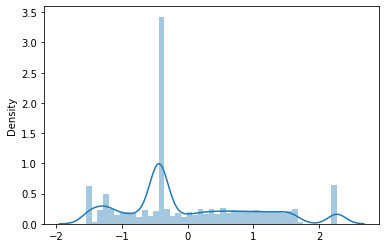

In [43]:
x_num_standardized = model_ss.transform(x_num)
sns.distplot(x_num_standardized)

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

**Train the model**

In [51]:
x_cat = pd.get_dummies(x_cat)
x_cat.shape

(7043, 13615)

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x_cat, y, test_size = 0.2, random_state = 42)

In [56]:
model_lg = LogisticRegression()
model_lg.fit(x_train, y_train)

LogisticRegression()

In [57]:
model_lg.score(x_test, y_test)

0.8041163946061036

In [59]:
y_predicted = model_lg.predict(x_test)
y_predicted

array(['Yes', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [60]:
pd.Series(y_predicted).value_counts()

No     1078
Yes     331
dtype: int64

In [61]:
pd.Series(y).value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [63]:
cf = confusion_matrix(y_test, y_predicted)
cf

array([[919, 117],
       [159, 214]], dtype=int64)

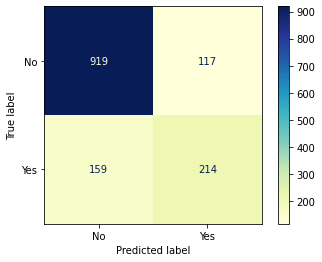

In [65]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model_lg, x_test, y_test, cmap = 'YlGnBu')
plt.show()

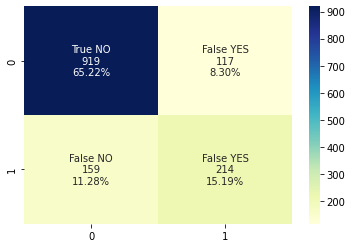

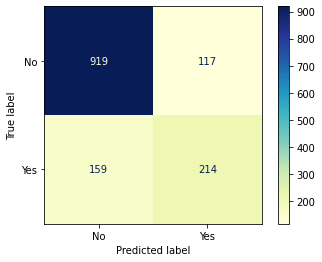

In [69]:
names = ['True NO','False YES',
         'False NO','False YES']
group_counts = ["{0:0.0f}".format(value) for value in cf.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf, annot=labels, fmt='', cmap='YlGnBu')
plot_confusion_matrix(model_lg, x_test, y_test, cmap = 'YlGnBu')
plt.show()

## SMOTE

In [71]:
#Synthetic Minority Oversampling TEchnique (SMOTE) is an over sampling technique based on nearest neighbors that 
#adds new points between existing points. Apply imblearn.over_sampling.SMOTE to the dataset. 
#Build and evaluate the logistic regression model. Is it there any improvement?

from imblearn.over_sampling import SMOTE

model_smote = SMOTE()

x_num_sm, y_sm = model_smote.fit_resample(x_num,y)
y_sm.value_counts()

No     5174
Yes    5174
Name: Churn, dtype: int64

In [93]:
#datasetFeature
#x_num
# Target variable
#y

x_num_train, x_num_test, y_train, y_test = train_test_split(x_num, y, test_size = 0.2)

#upsampled x_num_sm, y_sm


# Instantiate Logistic Regression model (using the default parameters)
model_logreg = LogisticRegression(random_state = 4, class_weight = 'balanced')

# Fit the model with train data
model_logreg.fit(x_num_sm,y_sm)



LogisticRegression(class_weight='balanced', random_state=4)

In [96]:
model_logreg.score(x_num_test, y_test) # conclusion that model is worse with upscale

0.7125621007806955

In [95]:
# Make predictions on test data set
y_sm_predicted = model_logreg.predict(x_num_test)

y_sm_predicted


array(['No', 'No', 'No', ..., 'Yes', 'Yes', 'Yes'], dtype=object)

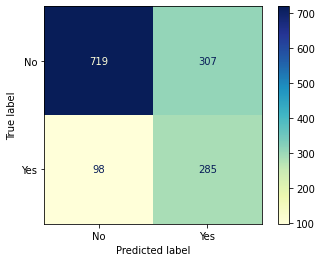

In [98]:
# Make Confusion Matrix to compare results against actual values
plot_confusion_matrix(model_logreg, x_num_test, y_test, cmap = 'YlGnBu')
plt.show()

In [101]:
#the samewith downsampling with Tomek Links
from imblearn.under_sampling import TomekLinks
model_tl = TomekLinks()

In [102]:
x_num_tl, y_tl = model_tl.fit_resample(x_num, y)

In [103]:
y_tl.value_counts()

No     4712
Yes    1869
Name: Churn, dtype: int64

In [104]:
#model estimation
#datasetFeature
#x_num
# Target variable
#y

x_num_train, x_num_test, y_train, y_test = train_test_split(x_num, y, test_size = 0.2)

#upsampled x_num_sm, y_sm


# Instantiate Logistic Regression model (using the default parameters)
model_logreg1 = LogisticRegression(random_state = 4, class_weight = 'balanced')

# Fit the model with train data
model_logreg1.fit(x_num_tl,y_tl)


LogisticRegression(class_weight='balanced', random_state=4)

In [105]:
model_logreg1.score(x_num_test, y_test) # similar as with upsampling

0.7246273953158269

In [106]:
y_tl_predicted = model_logreg1.predict(x_num_test)

y_tl_predicted

array(['No', 'No', 'Yes', ..., 'No', 'No', 'Yes'], dtype=object)

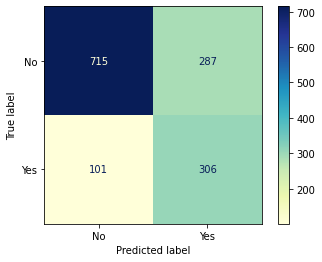

In [109]:
plot_confusion_matrix(model_logreg1, x_num_test, y_test, cmap = 'YlGnBu')
plt.show()